In [96]:
import numpy as np
import matplotlib.pyplot as plt
import mySVM as svm
from utils import plot, npmap

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
plt.rcParams["figure.figsize"] = 10, 8

# Dummy data set

In [5]:
dataset, labels = svm.load_data_set()

#### Display it

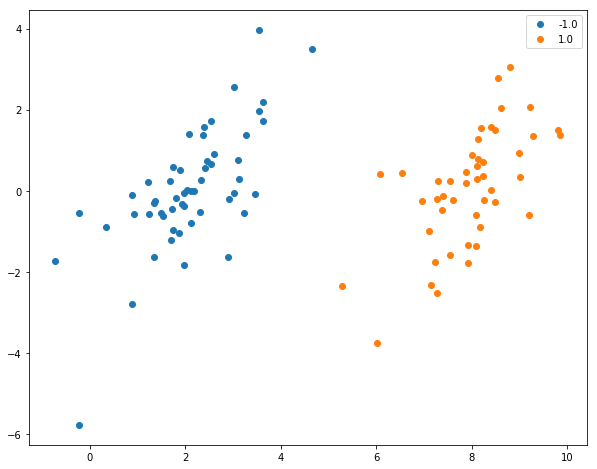

In [6]:
plot(dataset, labels)

#### Simplyfied version of Platt's smo

In [7]:
alphas, b = svm.platts_simple_smo(dataset, labels, 0.6, 1e-3, 40)

Time spent in platts_simple_smo: 1.42255 s


In [8]:
print(alphas[alphas>0], b)

[ 0.10803182  0.25582475  0.01007554  0.35378103] -3.86892144024


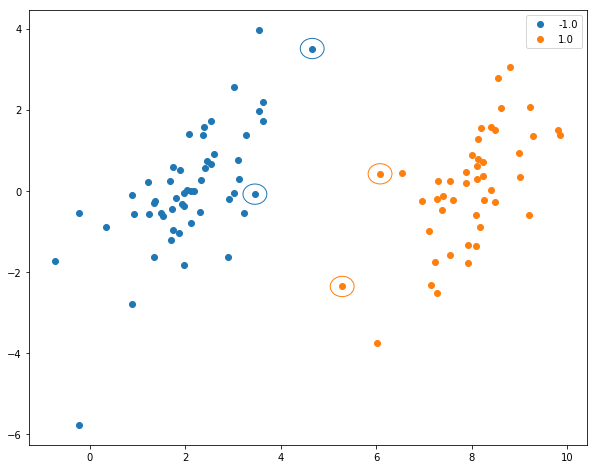

In [9]:
plot(dataset, labels)
svm.plot_support_vectors(dataset[alphas>0], labels[alphas>0], 0.25)

#### Full version of Platt's smo

In [97]:
smo = svm.PlattsSMO(dataset, labels, 0.6, 1e-3, 40)

Time spent in train: 0.03334 s
Number of support vectors: 11


In [11]:
print(smo.alphas[smo.alphas>0], smo.b)

[ 0.1003385   0.0103509   0.08394466  0.00316776  0.01190242  0.01190242
  0.02037983  0.02037983  0.06472498  0.00921069  0.06472498] -3.27494351213


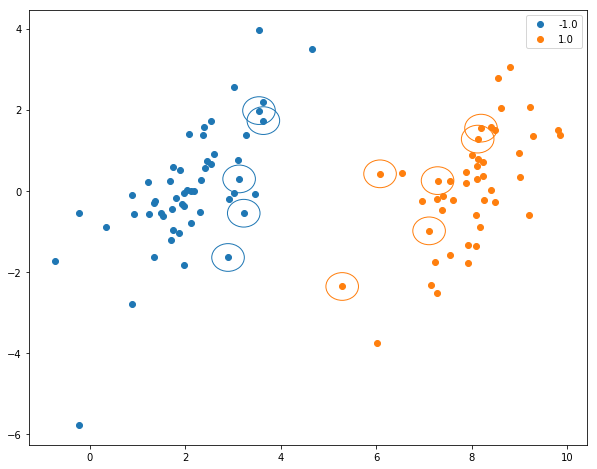

In [12]:
smo.plot_support_vectors(True)

In [13]:
smo.classify(dataset[2])

2.3082370335067779

### Kernel usage

In [63]:
rbfdataset, rbflabels = svm.load_data_set("testSetRBF.txt")

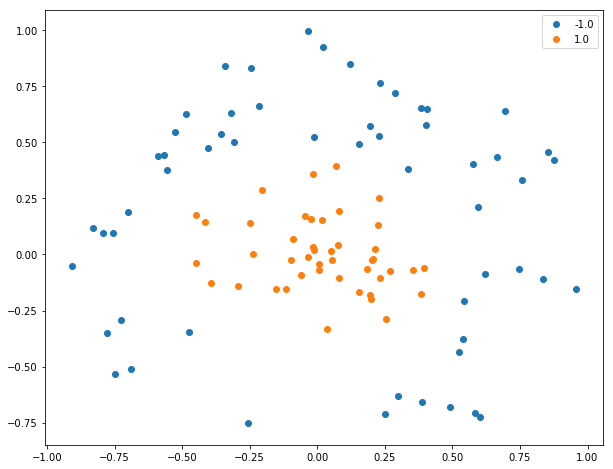

In [64]:
plot(rbfdataset, rbflabels)

In [66]:
rbfsmo = svm.PlattsSMO(rbfdataset, rbflabels, 200, 1e-4, 1e4, svm.RBFkernel(sigma=1.8))

Time spent in train: 0.05843 s
Number of support vectors: 26


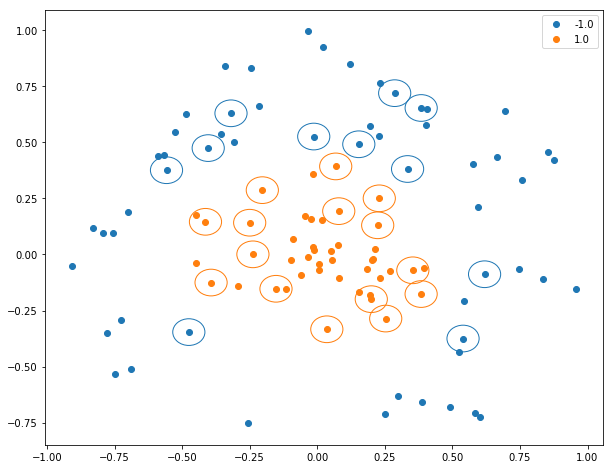

In [67]:
rbfsmo.plot_support_vectors(True)

#### Error rate

In [99]:
svm.test_rbf_kernel(1.6, True);

Time spent in train: 0.03015 s
Number of support vectors: 25
Traning error rate: 0.0 %
Testing error rate: 6.999999999999995 %


Time spent in train: 0.78799 s
Number of support vectors: 94
Time spent in train: 1.28124 s
Number of support vectors: 87
Time spent in train: 0.42680 s
Number of support vectors: 85
Time spent in train: 0.77405 s
Number of support vectors: 83
Time spent in train: 0.51076 s
Number of support vectors: 78
Time spent in train: 0.30625 s
Number of support vectors: 64
Time spent in train: 0.32927 s
Number of support vectors: 59
Time spent in train: 0.34294 s
Number of support vectors: 48
Time spent in train: 0.06634 s
Number of support vectors: 48
Time spent in train: 0.07916 s
Number of support vectors: 40
Time spent in train: 0.06641 s
Number of support vectors: 29
Time spent in train: 0.05330 s
Number of support vectors: 23
Time spent in train: 0.04126 s
Number of support vectors: 27
Time spent in train: 0.05036 s
Number of support vectors: 24
Time spent in train: 0.04455 s
Number of support vectors: 22
Time spent in train: 0.03745 s
Number of support vectors: 20
Time spent in train: 0.0

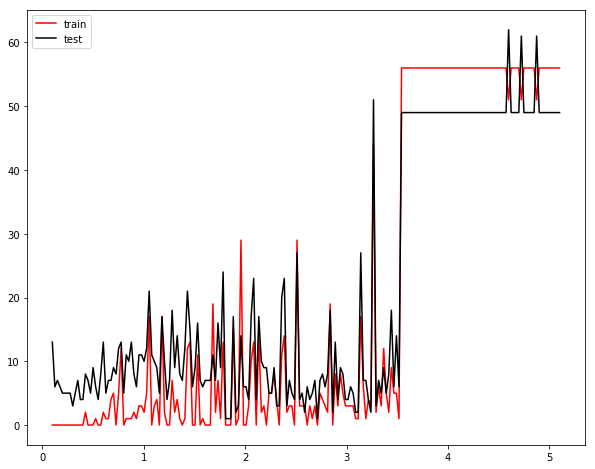

In [103]:
sigmas = np.linspace(0.1, 5.1, 200)
train, test = npmap(svm.test_rbf_kernel, sigmas).T
plt.plot(sigmas, train, "r", label="train")
plt.plot(sigmas, test , "k", label="test")
plt.legend()
print()

In [104]:
testdataset, testlabels = svm.load_data_set("testSetRBF2.txt")

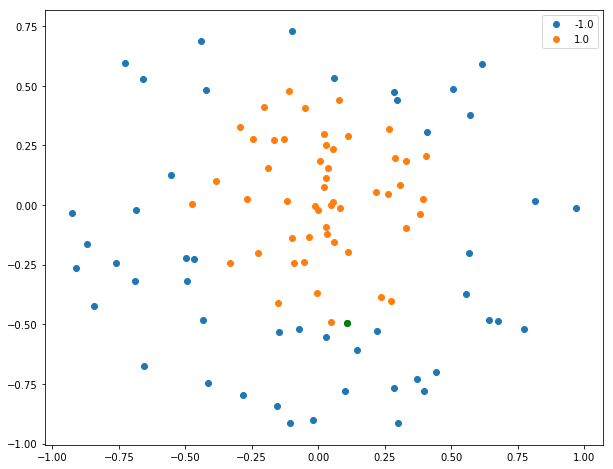

In [114]:
plot(testdataset, testlabels)
where = np.sign(rbfsmo.classify_all(testdataset)) != testlabels
plt.scatter(*testdataset[where].T, c="g")

In [118]:
svm.test_handwriting(14.2, True);

Time spent in train: 290.25788 s
Number of support vectors: 315
Traning error rate: 0.0 %
Testing error rate: 0.5285412262156397 %
